# RNN Sequence Prediction
## Task: Predict the next value in a sine wave sequence using SimpleRNN

In this notebook, we implement a Recurrent Neural Network (RNN) using the `SimpleRNN` layer in Keras. We will generate a synthetic sine wave dataset, preprocess it for time-series prediction, and train the model to predict the next value in the sequence.

**Note:** Figures will be saved to `/kaggle/working/` for easy access.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
np.random.seed(42)

# Define output directory for figures
OUTPUT_DIR = "/kaggle/working/"
if not os.path.exists(OUTPUT_DIR):
    OUTPUT_DIR = "figures/"
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)

print(f"Figures will be saved to: {OUTPUT_DIR}")

Figures will be saved to: /kaggle/working/


### 1. Data Generation
We generate a sine wave with 1000 points and add a small amount of Gaussian noise to make the task more realistic.

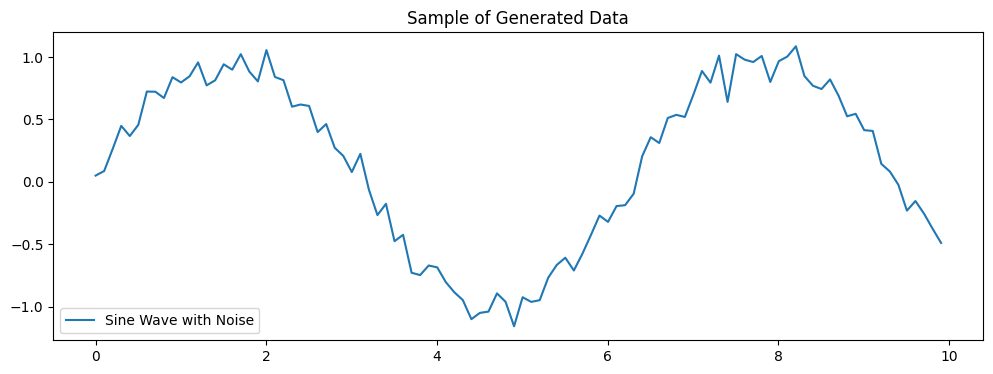

In [8]:
t = np.linspace(0, 100, 1000)
data = np.sin(t) + 0.1 * np.random.normal(size=1000)

plt.figure(figsize=(12, 4))
plt.plot(t[:100], data[:100], label='Sine Wave with Noise')
plt.title("Sample of Generated Data")
plt.legend()
plt.savefig(os.path.join(OUTPUT_DIR, "data_sample.png"))
plt.show()

### 2. Data Preprocessing
We use a sliding window approach to create input-output pairs. For a `window_size` of $L$, we use $x = [v_1, v_2, ..., v_L]$ to predict $y = v_{L+1}$.

In [9]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

WINDOW_SIZE = 20
X, y = create_sequences(data, WINDOW_SIZE)

# Reshape X for SimpleRNN: (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (784, 20, 1)
y_train shape: (784,)


### 3. Model Construction
We build a simple sequential model with one `SimpleRNN` layer and one `Dense` output layer.

In [10]:
model = Sequential([
    SimpleRNN(units=32, input_shape=(WINDOW_SIZE, 1), activation='tanh'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Model Training

In [11]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.7866 - val_loss: 0.0453
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0377 - val_loss: 0.0255
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - val_loss: 0.0191
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - val_loss: 0.0172
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - val_loss: 0.0184
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0175 - val_loss: 0.0164
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0156 - val_loss: 0.0183
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - val_loss: 0.0164
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0142 - val_loss: 0.0198
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0147 - val_loss: 0.0155
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - val_loss: 0.0158
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - val_l

### 5. Prediction and Visualization

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


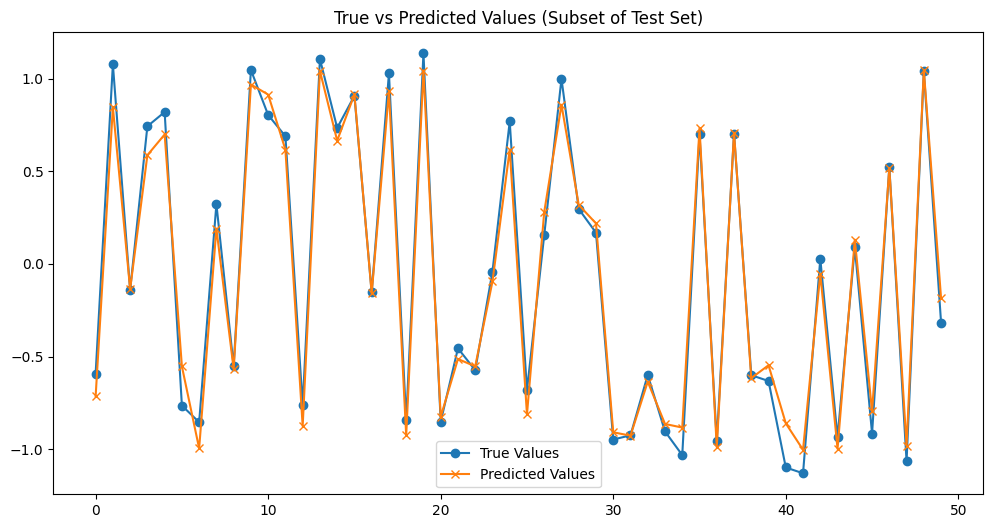

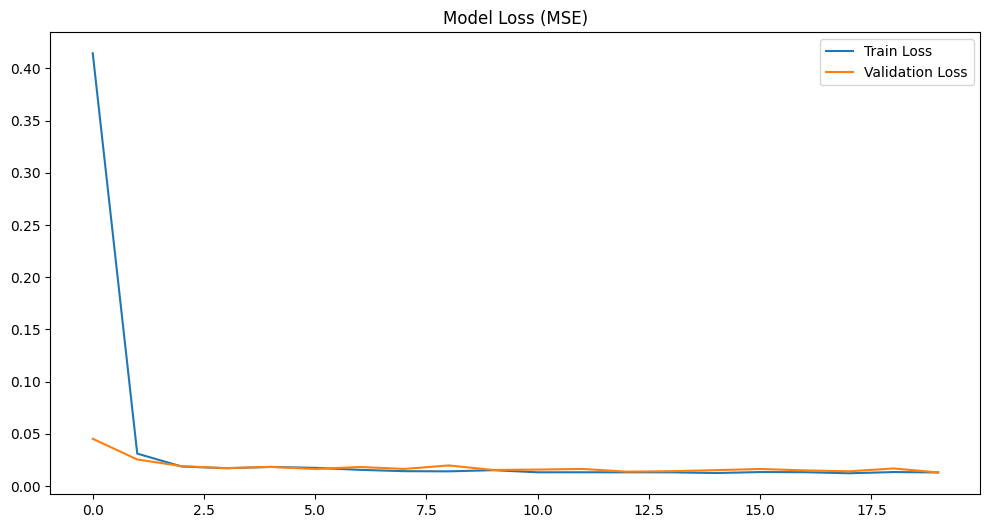

In [12]:
predictions = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test[:50], label='True Values', marker='o')
plt.plot(predictions[:50], label='Predicted Values', marker='x')
plt.title("True vs Predicted Values (Subset of Test Set)")
plt.legend()
plt.savefig(os.path.join(OUTPUT_DIR, "prediction_comparison.png"))
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss (MSE)")
plt.legend()
plt.savefig(os.path.join(OUTPUT_DIR, "training_loss.png"))
plt.show()